In [17]:
import os
import matplotlib.pyplot as plt

In [10]:
seeds = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [6]:
os.getcwd()

'/Users/jeromeroche/Documents/NUS/Thesis/TP/Continuous_Env/log_files/wind_map_1/Exp_scale/PPO_continuous_1_1_propulsion_15_4_0.9_500000/scale_1'

In [5]:
os.chdir('../log_files/wind_map_1/Exp_scale/PPO_continuous_1_1_propulsion_15_4_0.9_500000/scale_1/')

In [12]:
bonus = 10
scale = 1
rewards = []
for seed in seeds:
    rewards.append([])
    file = open('seed_'+str(seed)+'/monitoring.txt', 'r')
    if seed == 1:
        ts = []
    for line in file:
        split = line.split()
        rewards[seed - 1].append(float(split[1])/scale - bonus)
        if seed == 1:
            ts.append(int(split[0]))

In [15]:
data = []
for t in range(len(ts)):
    data.append([])
    for x in rewards:
        data[t].append(x[t])

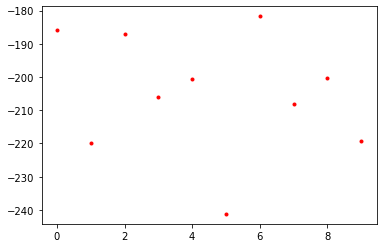

In [20]:
plt.plot(data[0], '.r')